In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* 변경하고 싶은 크기 입력 */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
## 위에 코드 -> 그래프 커도 스크롤 바 안 생기게 하는 코드

## 향수 브랜드별 순위

In [4]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [5]:
from IPython.display import display, HTML    #창 크게 맞게 주피터창 조절
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
npr.seed(10)
ar=np.zeros((10000,17),dtype=int)     #타입 안 정해주면 float 기본

ar[:,0]=np.arange(1,10001)     #id
ar[:,1]=np.random.randint(2,size=10000)        #gender
ar[:,2]=np.random.randint(10,91,size=10000)     #age
ar[:,3]=np.random.randint(1,11,size=10000)     #region
ar[:,4]=np.random.choice([11,22,33,44,55],10000)     #pdt_22 구매상품
ar[:,5]=np.random.choice([11,22,33,44,55],10000)     #pdt_23
ar[:,6]=np.zeros(10000,dtype=int)     #pri_22 가격
ar[:,7]=np.zeros(10000,dtype=int)     #pri_23
ar[:,8]=np.random.randint(1,21,10000)     #count_22 구매개수
ar[:,9]=np.random.randint(1,21,10000)     #count_23
ar[:,10]=np.random.randint(1,25,10000)     #time_22 가장 많이 구매한 시간대
ar[:,11]=np.random.randint(1,25,10000)     #time_23
ar[:,12]=np.random.randint(1,6,size=10000)     #channel 구매한 매장 유형
ar[:,13]=np.random.randint(1,10,size=10000)    #tr_y 누적 회원년수
ar[:,14]=np.zeros(10000,dtype=int)     #pur_22 구매총합
ar[:,15]=np.zeros(10000,dtype=int)     #pur_23
ar[:,16]=np.zeros(10000,dtype=int)     #sales (구매액 증가:1)

############## 데이터프레임 생성 ##############
col=['id','gender','age','region','pdt_22','pdt_23','pri_22','pri_23','ct_22','ct_23',
    'time_22','time_23','channel','tr_y','pur_22','pur_23','sales']

af=pd.DataFrame(ar, columns=col)
af=af.set_index('id')

af_org=af.copy()

############## NaN값 삽입 ##############
for i in range(len(af.iloc[0])-3):       #각 칼럼별 nan값 넣기(id, 구매액, 증감 제외)
    nan_c=random.sample(range(10000),10)
    for k in nan_c:
        af.iloc[k,i]=np.nan

af.isnull().sum()
df=af

In [7]:
##### 데이터프레임 생략 없이 뽑기 #####
# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None)

In [8]:
##### 나이 범주화 #####
def get_cate(age):
    cat=''
    if age<=39: cat='청년층'
    elif age<=69: cat='중년층'
    else: cat='장년층'
    return cat

df['age_cat']=df.age.apply(lambda x: get_cate(x))

In [9]:
##### 22년 인기상품 남:1, 여:2 #####
idx1 = (df['pdt_22']!=11) &  (df['gender']==0)  #상품11이 아닌 남자
bal=pd.DataFrame(df.pdt_22[idx1])
bal[::8] = pd.DataFrame([11 for i in range(len(bal[::8]))])
df.pdt_22[idx1]=bal.pdt_22

idx2 = (df['pdt_22']!=22)  &  (df['gender']==1)   #상품22가 아닌 여자
bal=pd.DataFrame(df.pdt_22[idx2])
bal[::8] = pd.DataFrame([22 for i in range(len(bal[::8]))])
df.pdt_22[idx2]=bal.pdt_22

##### 23년 인기상품 남,여:3 #####
idx1 = df['pdt_23']!=33      #상품33이 아닌
bal=pd.DataFrame(df.pdt_23[idx1])
bal[::10] = pd.DataFrame([33 for i in range(len(bal[::10]))])
df.pdt_23[idx1]=bal.pdt_23

##### 각 인기상품 구매개수 상승 #####
idx1 = (df['pdt_22']==11) &  (df['gender']==0)
idx2 = (df['pdt_22']==22)  &  (df['gender']==1)
df.ct_22[idx1 | idx2] +=10

idx3 = df['pdt_23']==3
df.ct_23[idx3] += 5

In [10]:
##### 23년 상품 구매수 변화 #####
#구매증가 
idx1 = df['pdt_23']==44
df.ct_23[idx1] +=30
idx1 = df['pdt_23']==33
df.ct_23[idx1] +=5
idx1 = df['pdt_23']==55
df.ct_23[idx1] +=15

#구매감소 
idx1 = (df['pdt_23']==11) | (df['pdt_23']==22)
df.ct_23[idx1] = (df.ct_23[idx1]//5 +1)*4

#22년 4번 조금 내림
idx1 = df['pdt_22']==44
df.ct_23[idx1] =(df.ct_23[idx1]//5+1)*4

In [11]:
##### 나이대별 선호 구매장소 #####
# 청년층 인터넷/ 중년층 백화점/ 장년층 면세점
idx1 = (df['channel']!=4) &  (df['age_cat']=='청년층')
bal=pd.DataFrame(df.channel[idx1])
bal[::10] = pd.DataFrame([4 for i in range(len(bal[::10]))])
df.channel[idx1]=bal.channel

idx2 = (df['channel']!=2) &  (df['age_cat']=='중년층')
bal=pd.DataFrame(df.channel[idx2])
bal[::10] = pd.DataFrame([2 for i in range(len(bal[::10]))])
df.channel[idx2]=bal.channel

idx3 = (df['channel']!=1) &  (df['age_cat']=='장년층')
bal=pd.DataFrame(df.channel[idx3])
bal[::3] = pd.DataFrame([1 for i in range(len(bal[::3]))])
df.channel[idx3]=bal.channel

# 올리브영 -> 중년층이 너무 많아서 청년층으로 바꿈
idx3 = (df['channel']==5) &  (df['age_cat']=='중년층')
bal=pd.DataFrame(df.age[idx3])
bal[::6] = pd.DataFrame(np.random.randint(10,40, len(bal[::6])))
df.age[idx3]=bal.age

df['age_cat']=df.age.apply(lambda x: get_cate(x))  #나이를 바꿔서 age_cat도 다시 넣어줌

In [12]:
##### 구매장소 #####
# 1. 면세점: 젤 비싼 제품들 위주/ 인당 구매 개수가 많은 편
# 2. 백화점: 젤 비싼 제품들 위주/ 구매자 수가 많은 편
# 3. 향수전문점 : 전체적으로 매출 낮음/ 단, 프리미엄 라인 잘 팔림
# 4. 인터넷: 전체적으로 매출 높음/ 구매자수 가장 많음
# 5. 올리브영: 저가형 제품 많음
    
# 인터넷, 향수전문점, 면세점 구매자수 조절
idx1 = (df['channel']!=4)
bal=pd.DataFrame(df.channel[idx1])
bal[::10] = pd.DataFrame([4 for i in range(len(bal[::10]))])
df.channel[idx1]=bal.channel

idx1 = (df['channel']==3)
bal=pd.DataFrame(df.channel[idx1])
bal[::3] = pd.DataFrame(np.random.choice([1,2,4,5],len(bal[::3])))
df.channel[idx1]=bal.channel

idx1 = (df['channel']==1)
bal=pd.DataFrame(df.channel[idx1])
bal[::3] = pd.DataFrame(np.random.choice([2,3,4,5],len(bal[::3])))
df.channel[idx1]=bal.channel

# 면세점/백화점: 22년(4,5번), 23년(2,5번) 제품 위주/ 인당 구매 수량 많음
idx1 = (df['channel']==1) | (df['channel']==2)
idx2 = (df['pdt_22']!=44) | (df['pdt_22']!=55)
idx2 = (df['pdt_23']!=22) | (df['pdt_23']!=55)

bal=pd.DataFrame(df.pdt_22[idx1&idx2])
bal[::3] = pd.DataFrame(np.random.choice([44,55],len(bal[::3])))
df.pdt_22[idx1&idx2]=bal.pdt_22
df.ct_22[idx1&idx2]+=5

bal=pd.DataFrame(df.pdt_23[idx1&idx3])
bal[::3] = pd.DataFrame(np.random.choice([22,55],len(bal[::3])))
df.pdt_23[idx1&idx3]=bal.pdt_23
df.ct_23[idx1&idx3]+=5

# 향수전문점: 22년(4,5번), 23년(5번) 제품 위주
idx1 = df['channel']==3
idx2 = (df['pdt_22']!=44) | (df['pdt_22']!=55)
idx2 = df['pdt_23']!=55

bal=pd.DataFrame(df.pdt_22[idx1&idx2])
bal[::3] = pd.DataFrame(np.random.choice([44,55],len(bal[::3])))
df.pdt_22[idx1&idx2]=bal.pdt_22

bal=pd.DataFrame(df.pdt_23[idx1&idx3])
bal[::4] = pd.DataFrame(np.random.choice([55],len(bal[::4])))
df.pdt_23[idx1&idx3]=bal.pdt_23

# 올리브영: 22년(1,2,3), 23년(1,3,4) 위주
idx1 = df['channel']==5
idx2 = (df['pdt_22']!=11) | (df['pdt_22']!=22) | (df['pdt_22']!=33)
idx2 = (df['pdt_22']!=11) | (df['pdt_22']!=33) | (df['pdt_22']!=44)

bal=pd.DataFrame(df.pdt_22[idx1&idx2])
bal[::2] = pd.DataFrame(np.random.choice([11,22,33],len(bal[::2])))
df.pdt_22[idx1&idx2]=bal.pdt_22

bal=pd.DataFrame(df.pdt_23[idx1&idx3])
bal[::2] = pd.DataFrame(np.random.choice([11,33,44],len(bal[::2])))
df.pdt_23[idx1&idx3]=bal.pdt_23

In [13]:
##### 구매 시간대 #####
# 인터넷 제외, 00~09시, 22~24시는 구매x -> 매장운영x
idx1 = df['channel']!=4 

bal=pd.DataFrame(df.time_22[idx1])
bal[::] = pd.DataFrame(np.random.randint(9,23,size=len(bal)))
df.time_22[idx1]=bal.time_22

bal=pd.DataFrame(df.time_23[idx1])
bal[::] = pd.DataFrame(np.random.randint(9,23,size=len(bal)))
df.time_23[idx1]=bal.time_23

In [14]:
##### 회원 누적연도에 따른 구매 증가 #####
for i in range(3,10):
    idx = df['tr_y']>=i
    df.ct_22[idx] += np.random.randint(0,3,len(df[idx]))
    df.ct_23[idx] += np.random.randint(0,3,len(df[idx]))

In [15]:
#### 22년 대비 23년 매출감소
df.ct_23 = (df.ct_23//5+1)*3

In [16]:
# nan값 처리/ 각 상품에 맞는 가격 삽입/ 데이터 타입변경
df.dropna(subset=['pdt_22', 'pdt_23', 'ct_22', 'ct_23', 'pur_22', 'pur_23'], axis=0, inplace=True)
df.age.replace(np.nan, 0, inplace=True)
df.tr_y.replace(np.nan, 0, inplace=True)

t22=df['time_22'].value_counts(dropna=True).idxmax()    #가장 많이 등장한 값 뽑기
df['time_22'].fillna(t22, inplace=True)
t23=df['time_23'].value_counts(dropna=True).idxmax()
df['time_23'].fillna(t23, inplace=True)

price_dict1 = {11: 2000, 22: 3000, 33: 4000, 44: 7000, 55: 10000}
price_dict2 = {11: 3000, 22: 6000, 33: 2000, 44: 5000, 55: 12000}
df['pri_22'] = df['pdt_22'].map(price_dict1)
df['pri_23'] = df['pdt_23'].map(price_dict2)

df['pur_22'] = df['pri_22'] * df['ct_22']
df['pur_23'] = df['pri_23'] * df['ct_23']
df['sales'] = np.where(df['pur_22']-df['pur_23'] > 0, 0,1)

df[['age','time_22','time_23','pur_22','pur_23','pri_22','pri_23','ct_22','ct_23','tr_y']]=df[['age','time_22','time_23','pur_22','pur_23','pri_22','pri_23','ct_22','ct_23','tr_y']].astype('int')

In [17]:
# 데이터명 수정/ 매출 총액, 전년대비 매출 증감폭 칼럼 추가/ 안 쓰는 칼럼 삭제
df.gender.replace({0:'남성',1:'여성', np.nan:'정보없음'}, inplace=True)
df['pdt_22'].replace({11:'조말론',22:'샤넬',33:'랑방',44:'디올',55:'에르메스'}, inplace=True)
df['pdt_23'].replace({11:'조말론',22:'샤넬',33:'랑방',44:'디올',55:'에르메스'}, inplace=True)
df.channel.replace({1:'면세점',2:'백화점',3:'향수전문점',4:'인터넷',5:'올리브영',np.nan:'기타'}, inplace=True)

df.insert(15,'pur_all', df.pur_22 + df.pur_23)
df.insert(16,'pur_gap', abs(df.pur_23 - df.pur_22))

df=df.drop('region',axis=1)

In [18]:
# df.isnull().sum()

In [19]:
df.tail()

,gender,age,pdt_22,pdt_23,pri_22,pri_23,ct_22,ct_23,time_22,time_23,channel,tr_y,pur_22,pur_23,pur_all,pur_gap,sales,age_cat
id,,,,,,,,,,,,,,,,,,
9996,남성,63,에르메스,랑방,10000,2000,25,21,2,14,인터넷,9,250000,42000,292000,208000,0,중년층
9997,여성,65,디올,디올,7000,5000,11,30,15,11,백화점,5,77000,150000,227000,73000,1,중년층
9998,여성,42,샤넬,랑방,3000,2000,15,12,10,15,올리브영,8,45000,24000,69000,21000,0,중년층
9999,남성,69,랑방,랑방,4000,2000,20,6,21,11,인터넷,2,80000,12000,92000,68000,0,중년층
10000,여성,23,디올,에르메스,7000,12000,19,12,22,20,올리브영,5,133000,144000,277000,11000,1,청년층


### 채널별 인기상품

Text(1.0, 1.0, '23년 장소별 판매상품 수')

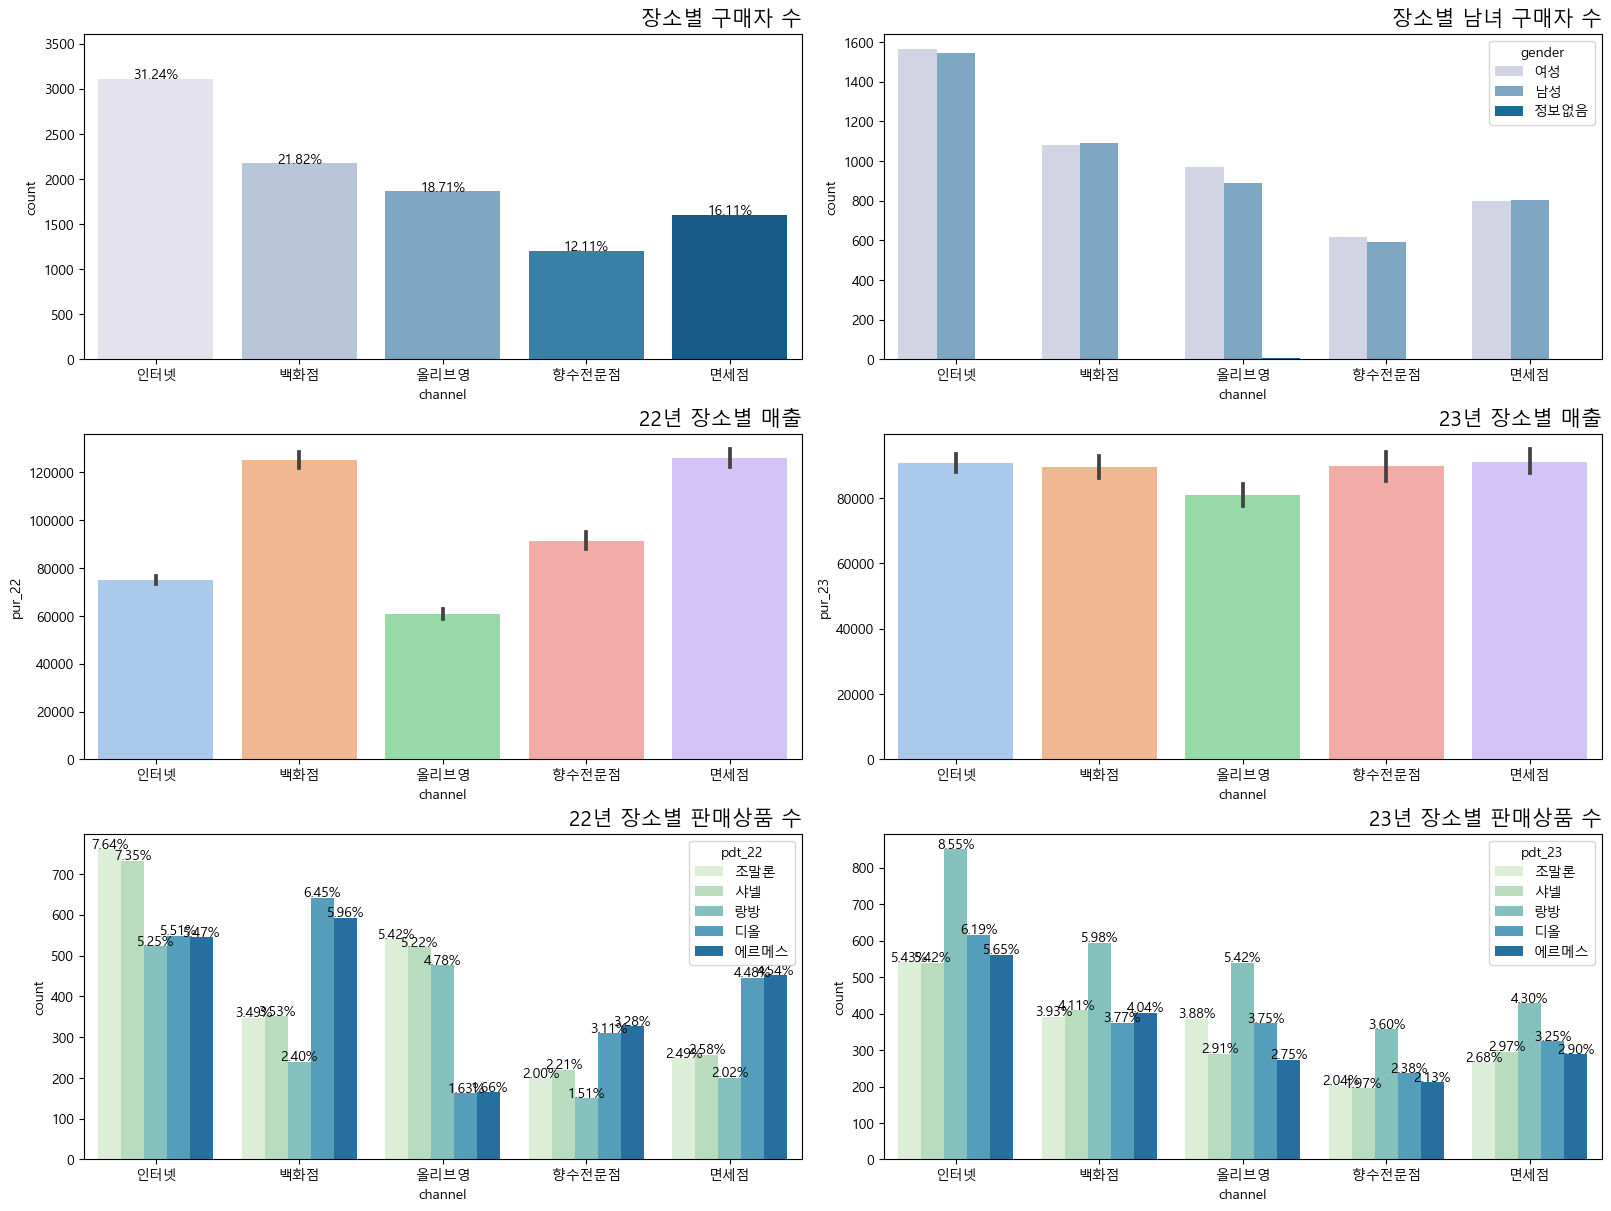

In [20]:
##### 구매장소에 따른 구매자수, 매출 확인 #####
# 구매장소별 구매자수/ 22년 장소별 매출/ 
# 22년 장소별,상품별 매출/ 장소별, 상품별 구매자수

idx=df['channel']!='기타'; af = df[idx]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,12), constrained_layout=True)
#=================================================================================
sns.countplot(x='channel', data=af, palette='PuBu', ax=ax[0,0])

total = float(len(af))  # 데이터 전체 개수
ax[0,0].set_ylim([0, max(af['channel'].value_counts()) + 500])
for p in ax[0,0].patches:
    height = p.get_height()
    ax[0,0].text(p.get_x()+p.get_width()/2., height+3, '{:.2f}%'.format(height/total*100), ha="center")
#=================================================================================
sns.countplot(x='channel', data=af, hue='gender', palette='PuBu', ax=ax[0,1])

sns.barplot(x='channel', y='pur_22', data=af, palette='pastel', ax=ax[1,0])
sns.barplot(x='channel', y='pur_23', data=af, palette='pastel', ax=ax[1,1])
#=================================================================================
order=['조말론','샤넬','랑방','디올','에르메스']
sns.countplot(x='channel', hue='pdt_22', data=af, palette='GnBu', hue_order=order, ax=ax[2,0])

total_products_22 = float(len(af.dropna(subset=['pdt_22'])))  # 22년 전체 판매 상품 수
for p in ax[2,0].patches:
    height = p.get_height()
    ax[2,0].text(p.get_x()+p.get_width()/2., height+3, '{:.2f}%'.format(height/total_products_22*100), ha="center")
#=================================================================================
sns.countplot(x='channel', hue='pdt_23', data=af, palette='GnBu', hue_order=order, ax=ax[2,1])

total_products_23 = float(len(af.dropna(subset=['pdt_23'])))  # 23년 전체 판매 상품 수
for p in ax[2,1].patches:
    height = p.get_height()
    ax[2,1].text(p.get_x()+p.get_width()/2., height+3, '{:.2f}%'.format(height/total_products_23*100), ha="center")
#=================================================================================
ax[0,0].set_title("장소별 구매자 수",loc='right',size=15)
ax[0,1].set_title("장소별 남녀 구매자 수",loc='right',size=15)
ax[1,0].set_title("22년 장소별 매출",loc='right',size=15)
ax[1,1].set_title("23년 장소별 매출",loc='right',size=15)
ax[2,0].set_title("22년 장소별 판매상품 수",loc='right',size=15)
ax[2,1].set_title("23년 장소별 판매상품 수",loc='right',size=15)




### 성별에 따른 인기상품

In [21]:
##### 성별에 따른 인기상품 확인 #####
a = df.groupby(['gender','pdt_22'])
ap22 = a.agg({'ct_22':['sum','count']})

b = df.groupby(['gender','pdt_23'])
bp23 = b.agg({'ct_23':['sum','count']})

# ap22
bp23

ct_23      
                 sum count
gender pdt_23             
남성     디올      25176   940
       랑방      17904  1362
       샤넬       8517   861
       에르메스    16194   865
       조말론      9093   892
여성     디올      26229   985
       랑방      18417  1411
       샤넬       8817   871
       에르메스    16566   873
       조말론      9324   894
정보없음   디올         27     1
       랑방         45     3
       샤넬         18     2
       에르메스       15     1
       조말론        36     3

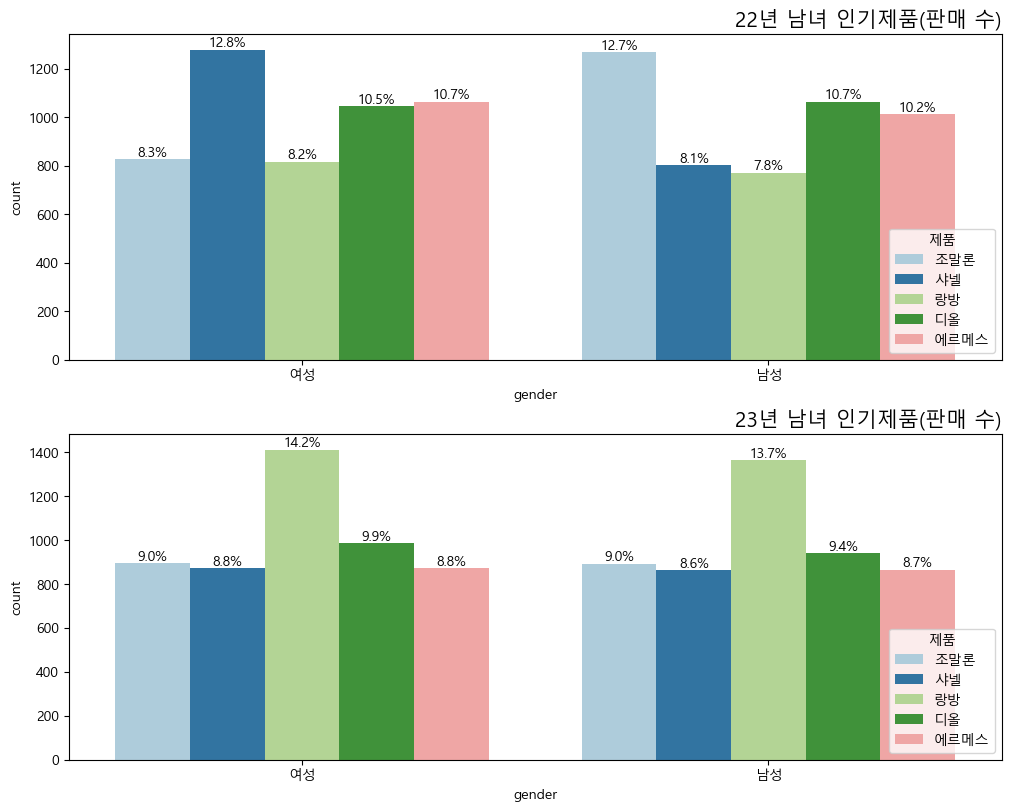

In [22]:
##### 성별에 따른 인기상품 확인 #####
idx=df['gender']!='정보없음'
af = df[idx]

fig, axs = plt.subplots(nrows=2, figsize=(10,8), constrained_layout=True)

order=order=['조말론','샤넬','랑방','디올','에르메스']     # hue라벨 순서
sns.countplot(x='gender', hue='pdt_22', data=af, palette='Paired', hue_order=order, ax=axs[0])
sns.countplot(x='gender', hue='pdt_23', data=af, palette='Paired', hue_order=order, ax=axs[1])

#그래프 위에 비율 표시하기
for ax_idx, col_name in zip([0, 1], ['pdt_22', 'pdt_23']):
    ax = axs[ax_idx]
    for patch in ax.patches:
        x_pos = patch.get_x() + patch.get_width() / 2
        y_pos = patch.get_height()
        total = float(len(af))
        ratio = y_pos / total * 100
        ax.text(x_pos, y_pos, f'{ratio:.1f}%', ha='center', va='bottom')

axs[0].legend(title='제품', loc='lower right')
axs[1].legend(title='제품', loc='lower right')

axs[0].set_title("22년 남녀 인기제품(판매 수)",loc='right', size=15)
axs[1].set_title("23년 남녀 인기제품(판매 수)",loc='right', size=15)
plt.show()

### 성별 선호 브랜드의 차이
    - 남:조말론, 여:샤넬 
     ==> 가격 변동 이후 남녀 모두 랑방으로 선호도 변화
        - 조말론 50% 상승/ 샤넬 100% 상승 / 랑방 50% 하락 / 디올 약 29% 하락 / 에르메스 20% 상승
- 조말론의 가격이 상승에 따른 변화
    - 남성은 3.8% 감소했기에 이를 위해서 증정품 증정 등 남성을 위한 행사도 좋을 듯 하다.
<br><br>
- 샤넬 브랜드는 가격이 상승에 따른 변화
    - 가격의 100% 상승으로 여성의 구매율은 4%정도 하락함
    - 샤넬은 총매출에 10% 이상은 차지하기 때문에 가격에 대한 정책을 생각해봐야할 것 같다.
<br><br>
- 랑방
    - 50% 하락으로 여성, 남성 모두 상승. 그러나 아래 가격변화로 인한 총매출 변화를 보면 보완 필요
<br><br>
- 디올은 29% 하락했는데 여성, 남성 모두 하락. 가격이 비싸야 구매욕구를 주는 것 같다. 다시 올리기
<br><br>
- 에르메스
    - 20% 가격이 상승함에 따라 여성, 남성의 판매수는 줄었다. 그러나 아래 총매출을 확인하면 가격상승이 판매수 감소를 커버함.

### 연령대에 따른 채널 선호도

In [23]:
##### 연령에 따른 채널 선호도 확인 #####
a = df.groupby(['age_cat','channel'])
ap22 = a.agg({'channel':'count'})
ap22

channel
age_cat channel         
장년층     기타             1
        면세점          698
        백화점          432
        올리브영         428
        인터넷          659
        향수전문점        293
중년층     기타             4
        면세점          455
        백화점         1032
        올리브영         674
        인터넷         1054
        향수전문점        446
청년층     기타             4
        면세점          451
        백화점          708
        올리브영         761
        인터넷         1397
        향수전문점        467

Text(1.0, 1.0, '채널에 따른 연령대별 선호도')

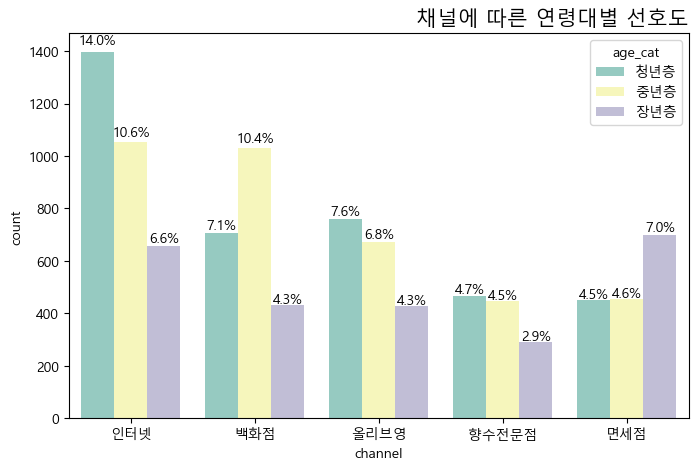

In [24]:
##### 채널별 특정 연령 선호도 확인 #####
idx=df['channel']!='기타'; af = df[idx]

plt.figure(figsize=(8,5))
order=['청년층','중년층','장년층']
ax = sns.countplot(x='channel', hue='age_cat', hue_order=order, data=af, palette='Set3')

#막대 그래프들 위에 %수치 표시
total_count = len(af)
for p in ax.patches:
    height = int(p.get_height())
    x, y = p.get_xy()
    percentage = height / total_count * 100
    ax.text(x + p.get_width() / 2, y + height * 1.02, f'{percentage:.1f}%', ha='center')

plt.title('채널에 따른 연령대별 선호도', loc='right', size=15)

### 연령별 선호 채널의 차이
    - 청년층:인터넷, 중년층:백화점, 장년층:면세점 선호하는 양상.
    - 채널별 인기상품 그래프 중 22-23년 장소별 구매자수를 보면 5개의 장소 중 인터넷의 구매자 수가 31%로 제일 높다. 
      아무래도 인터넷에 익숙한 청년들이기에 청년들이 가장 높은데 인터넷의 구매자를 높이려면 좀 더 인터넷의 장벽을 낮추면 좋을 것 같다.
      ex) 어르신들은 티비에서 사는 것처럼 전화로 구매하는 등, 구매 방법의 단순화 등 
    - 년도를 비교해서 보면 22년도에 고가상품들이 백화점, 향수전문점, 면세점에서 집중적으로 팔렸는데, 23년 때 가격변동으로 인해 저가 상품들의 구매율이 높아지고 이에 따라 저가 상품들이 더 잘 팔리는 인터넷, 올리브영에서의 매출이 상승한 것을 알 수 있다. 
     

### 채널별 구매 시간대 확인

In [25]:
##### 구매 시간대 확인 #####
a = df.groupby(['channel','time_22'])
ap22 = a.agg({'time_22':'count'})
ap22

time_22
channel time_22         
기타      13             1
        14             3
        17             1
        18             1
        19             1
...                  ...
향수전문점   18            86
        19            87
        20           100
        21            68
        22            71

[87 rows x 1 columns]

In [26]:
##### 구매 시간대 확인 #####
dic1,dic2,dic3,dic4,dic5=[0]*25, [0]*25, [0]*25, [0]*25, [0]*25   #각 장소별 시간대 카운트
listdic=[dic1,dic2,dic3,dic4,dic5]
chlist=['면세점','백화점','향수전문점','인터넷','올리브영']

for k in range(len(chlist)):   #장소
    idx1 = df['channel']==chlist[k]
    for i in range(25):    #시간대
        idx2 =  (df['time_22']==i) | (df['time_23']==i)
        listdic[k][i] = len(df[idx1 & idx2])

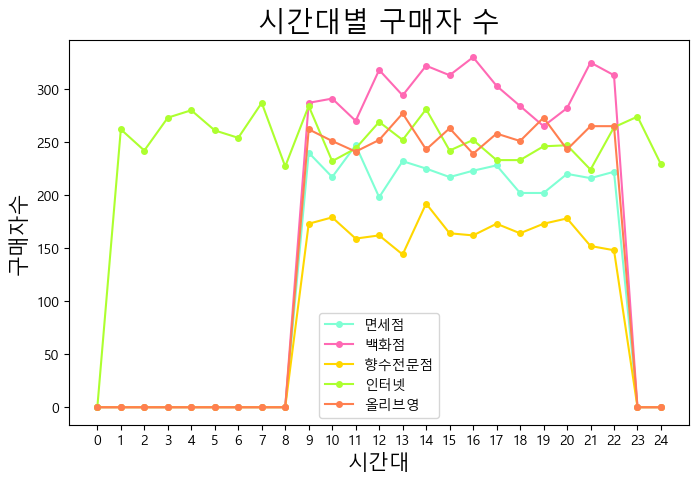

In [27]:
##### 구매 시간대 확인 #####
x=np.arange(25)
y1, y2, y3, y4, y5 =listdic[0], listdic[1], listdic[2], listdic[3], listdic[4]

ax = plt.figure(figsize=(8,5)).add_subplot(1,1,1)
ticks = ax.set_xticks([i for i in range(0,25)])

plt.plot(x,y1, color='aquamarine', marker='o', markersize=4, label="면세점")
plt.plot(x,y2, color='hotpink', marker='o', markersize=4, label="백화점")
plt.plot(x,y3, color='gold', marker='o', markersize=4, label="향수전문점")
plt.plot(x,y4, color='greenyellow', marker='o', markersize=4, label="인터넷")
plt.plot(x,y5, color='coral', marker='o', markersize=4, label="올리브영")

plt.title('시간대별 구매자 수', size=20)
plt.xlabel('시간대',size=15)
plt.ylabel('구매자수',size=15)
plt.legend()

### 회원 누적연도에 따른 구매량

In [28]:
##### 누적연도에 따른 구매증가 확인 #####
a = df.groupby(['tr_y'])
ap22 = a.agg({'ct_22':'sum', 'pur_22':['sum','mean'], 'ct_23':'sum', 'pur_23':['sum','mean']}).round(1)
ap22

ct_22     pur_22            ct_23     pur_23         
        sum        sum      mean    sum        sum     mean
tr_y                                                       
0       184     705000   70500.0    114     543000  54300.0
1     16956   85182000   78077.0  14961   86664000  79435.4
2     16809   84267000   76190.8  15195   88665000  80167.3
3     18214   93281000   84264.7  16026   89814000  81132.8
4     17955   88735000   84429.1  15768   88269000  83985.7
5     20226  103998000   93945.8  17346   99099000  89520.3
6     21812  110648000   97918.6  18207  102663000  90852.2
7     22637  114812000  103062.8  18816  104475000  93783.7
8     24669  125359000  109388.3  19818  112383000  98065.4
9     24708  124646000  113108.9  20127  110088000  99898.4

Text(1.0, 1.0, '23년 회원 누적년도별 매출 평균')

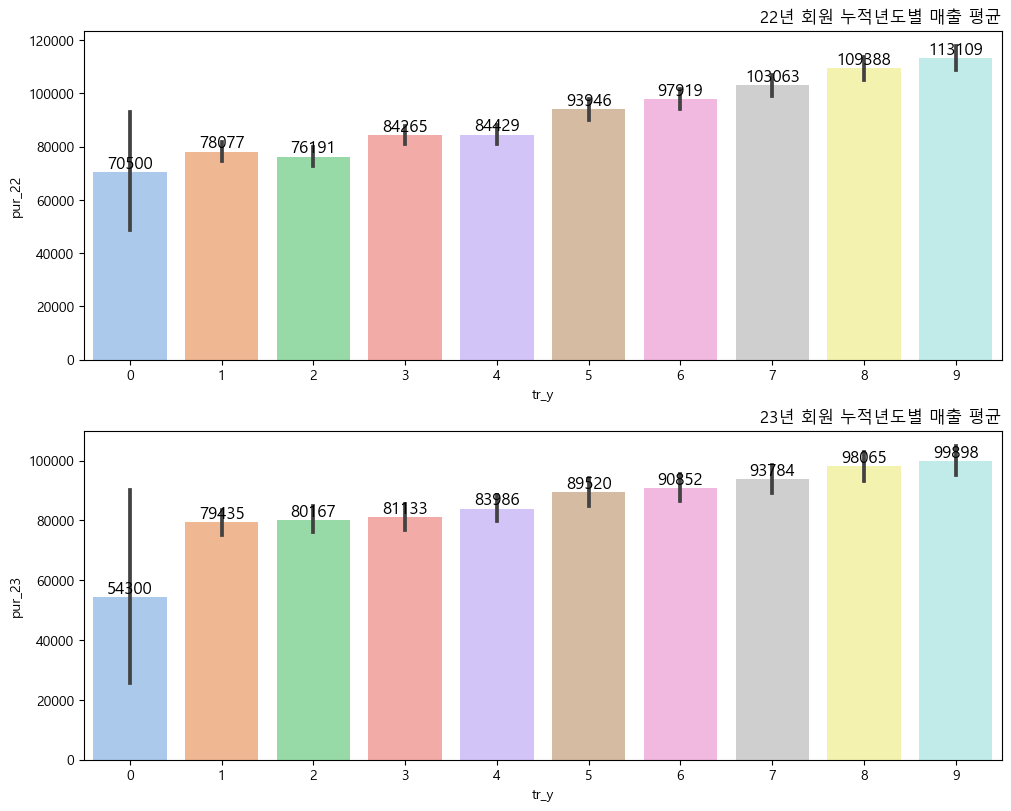

In [29]:
##### 누적연도에 따른 구매증가 확인 #####
fig, ax = plt.subplots(nrows=2, figsize=(10,8), constrained_layout=True)
# constrained_layout=True: 각 그래프 간 간격 최적화

sns.barplot(x='tr_y', y='pur_22', data=df, palette='pastel', ax=ax[0])
sns.barplot(x='tr_y', y='pur_23', data=df, palette='pastel', ax=ax[1])

# 각 그래프 위에 수치 표시하기
for p in ax[0].patches:
    ax[0].text(p.get_x() + p.get_width() / 2, p.get_height(), '%.0f' % p.get_height(), 
               fontsize=12, color='black', ha='center', va='bottom')
for p in ax[1].patches:
    ax[1].text(p.get_x() + p.get_width() / 2, p.get_height(), '%.0f' % p.get_height(), 
               fontsize=12, color='black', ha='center', va='bottom')

ax[0].set_title("22년 회원 누적년도별 매출 평균",loc='right')
ax[1].set_title("23년 회원 누적년도별 매출 평균",loc='right')

### 22년 대비 23년 상품별 매출

In [30]:
# 제품별 매출/개수
a = df.groupby(['pdt_22'])
ap22 = a.agg({'pur_22':'sum', 'ct_22':'sum'}).round(1)

a = df.groupby(['pdt_23'])
ap23 = a.agg({'pur_23':'sum', 'ct_23':'sum'}).round(1)

In [31]:
## 22년 대비 23년 매출: 약 5% 하락
(1 - (df.pur_23.sum() / df.pur_22.sum())) *100

5.256361678901456

In [37]:
df22_23 = pd.DataFrame(index=['조말론','샤넬','랑방','디올','에르메스'])

df22_23['price'] = ['+50%','+100%','-50%','-28.57%','+20%']    #전년대비 가격 상승률

df22_23['p22'] = ap22.pur_22   #22년 제품 매출
df22_23['p23'] = ap23.pur_23   #23년 제품 매출
df22_23['pur'] = ap23.pur_23 - ap22.pur_22     #각 상품별 매출액 추이
df22_23['pur%'] = (ap23.pur_23 / (ap22.pur_22/100))-100    #22년 대비 매출 증감%

df22_23['c22'] = ap22.ct_22  #22년 제품 판매 개수
df22_23['c23'] = ap23.ct_23  #23년 제품 판매 개수
df22_23['count%'] = ((df22_23.c23/(df22_23.c22/100))-100).round(2)     #각 상품별 구매량(개수) 증감

df22_23['22 매출비율'] = ((df22_23.p22 / df22_23.p22.sum())*100).round(1)   #22년 상품별 매출비율
df22_23['23 매출비율'] = ((df22_23.p23 / df22_23.p23.sum())*100).round(1)   #23년 상품별 매출비율
df22_23['percent'] = df22_23['23 매출비율'] - df22_23['22 매출비율']   #상품별 매출비율 증감

a,b,c,d,e = df22_23.p22.sum(), df22_23.p23.sum(), df22_23.pur.sum(), df22_23.c22.sum(), df22_23.c23.sum()
f = (b/(a/100))-100
g = ((e/(d/100))-100).round(2)
df22_23.loc[len(df22_23)] = ['+7.69%',a,b,c,f, d,e,g, 100, 100,0]
df22_23 = df22_23.rename(index={5:'총계'})

df22_23



,price,p22,p23,pur,pur%,c22,c23,count%,22 매출비율,23 매출비율,percent
조말론,+50%,87072000,55359000,-31713000,-36.421582,43536,18453,-57.61,9.3,6.3,-3.0
샤넬,+100%,130713000,104112000,-26601000,-20.350692,43571,17352,-60.18,14.0,11.8,-2.2
랑방,-50%,98304000,72732000,-25572000,-26.013184,24576,36366,47.97,10.6,8.2,-2.4
디올,-28.57%,255094000,257160000,2066000,0.809898,36442,51432,41.13,27.4,29.1,1.7
에르메스,+20%,360450000,393300000,32850000,9.113608,36045,32775,-9.07,38.7,44.6,5.9
총계,+7.69%,931633000,882663000,-48970000,-5.256362,184170,156378,-15.09,100.0,100.0,0.0


### 가격 변동에 따른 브랜드 구매량의 변화
우선 22년 대비 23년 매출 5% 하락 (국내외적인 물가 불안정 등)

- 조말론,샤넬: 판매수량 약 50-60% 크게 감소(거의 절반 가까이 down, 작년대비 약 %12감소), 그래서 매출도 감소. 
    - 그렇지만 원그래프에서 총매출비율을 보면 전년대비 2-3% 하락
    - 이는 앞서 말했듯이 총 매출이 작년대비 5% 하락했고, 
    - 작년대비 조말로는 가격이 50%, 샤넬은 100% 증가한 것이 총매출비율에서 2-3% 정도만 하락할 수 있었던 원인이라 볼 수 있다.
  -> 구매율을 높이기 위한 가격 인하 또는 작은 사은품 증정 등 행사를 하면 좋을 것 같다.
<br><br>
- 랑방: 판매수량은 약 48% 정도 올랐는데 매출은 26% 하락
    - 가격이 작년대비 50%정도 떨어진 것이 영향. 그래서 총매출 비율에서도 2% 정도 하락. 
    - 가격이 떨어져서 수량이 올랐지만, 매출이 하락했다면 가격하락을 좀 덜 해도 좋을 것 같다.
<br><br>
- 디올: 판매수량, 매출 모두 up
    - 가격 인하를 했음에도 매출이 늘지 않은 브랜드.
    - 가격이 29% 하락했음에도 불구하고 판매 수량은 41% 증가했고 총매출 비율도 1.7% 상승
<br> <br>  
- 에르메스: 가격이 20% 상승했음에도 수량이 크게 줄지 않음 -> 매출 약 6% up
    - 가격 상승을 했음에도 매출이 꾸준한 브랜드.
<br>  <br>  
- 구매량에 많은 변화가 있지만 결과적으로 총 매출 순위에는 큰 변동이 없는 양상.

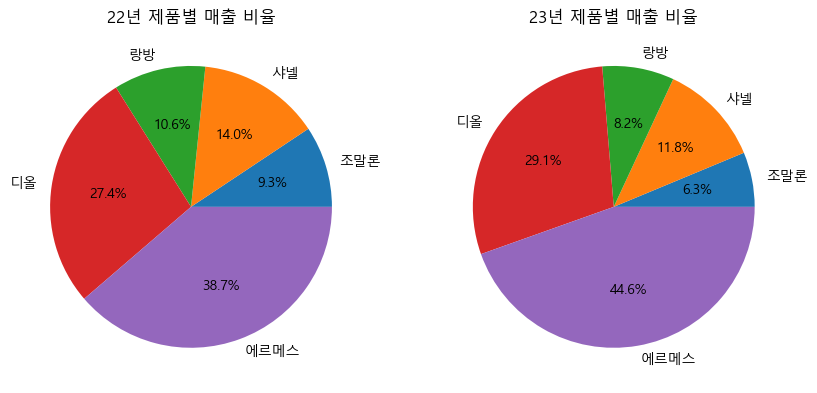

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

##  22년도 제품별 매출
df1_sum = df.loc[df['pdt_22']=='조말론','pur_22'].sum()
df2_sum = df.loc[df['pdt_22']=='샤넬','pur_22'].sum()
df3_sum = df.loc[df['pdt_22']=='랑방','pur_22'].sum()
df4_sum = df.loc[df['pdt_22']=='디올','pur_22'].sum()
df5_sum = df.loc[df['pdt_22']=='에르메스','pur_22'].sum()

data = {'조말론': df1_sum,'샤넬': df2_sum,'랑방': df3_sum,'디올': df4_sum,'에르메스': df5_sum,}
labels = list(data.keys())
sales_22 = list(data.values())

axes[0].pie(sales_22, labels=labels, autopct='%.1f%%')
axes[0].set_title('22년 제품별 매출 비율')

###############################################
##  23년도 제품별 매출

df1_sum = df.loc[df['pdt_23']=='조말론','pur_23'].sum()
df2_sum = df.loc[df['pdt_23']=='샤넬','pur_23'].sum()
df3_sum = df.loc[df['pdt_23']=='랑방','pur_23'].sum()
df4_sum = df.loc[df['pdt_23']=='디올','pur_23'].sum()
df5_sum = df.loc[df['pdt_23']=='에르메스','pur_23'].sum()

data = {'조말론': df1_sum,'샤넬': df2_sum,'랑방': df3_sum,'디올': df4_sum,'에르메스': df5_sum,}
labels = list(data.keys())
sales_23 = list(data.values())

axes[1].pie(sales_23, labels=labels, autopct='%.1f%%')
axes[1].set_title('23년 제품별 매출 비율')
plt.show()

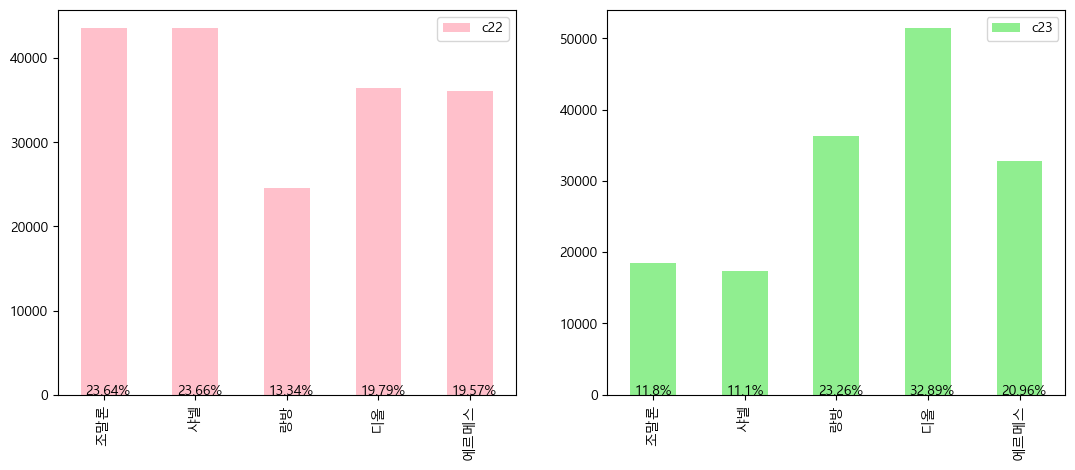

In [54]:
af = df22_23.drop('총계')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))


total_22 = af['c22'].sum()
total_23 = af['c23'].sum()

af['c22_ratio'] = (af['c22'] / total_22) * 100
af['c23_ratio'] = (af['c23'] / total_23) * 100

af.plot(y='c22', kind='bar', ax=axes[0], color='pink')
af.plot(y='c23', kind='bar', ax=axes[1], color='lightgreen')

for i, v in enumerate(af['c22_ratio']):
    axes[0].text(i-0.2, v+1, str(round(v,2))+'%', fontsize=10)

for i, v in enumerate(af['c23_ratio']):
    axes[1].text(i-0.2, v+1, str(round(v,2))+'%', fontsize=10)


plt.show()